
질문
``` 
각 분석 방향성에 따른 DDA, EDA python 코드 데이터셋 참고하여 작성
DDA, EDA 명확하게 구분해서 작성
[데이터셋]
ID

Gender

Ever_Married

Age

Graduated

Profession

Work_Experience

Spending_Score

Family_Size

Var_1
458989
Female
Yes
36
Yes
Engineer
0.0
Low
1.0
Cat_6
458994
Male
Yes
37
Yes
Healthcare
8.0
Average
4.0
Cat_6
458996
Female
Yes
69
No
0.0
Low
1.0
Cat_6
459000
Male
Yes
59
No
Executive
11.0

[분석 방향성] 
1. 성별에 따른 지출 점수 분석
성별 분포 분석
각 성별에 따른 지출 점수의 평균 및 분포 분석
성별에 따른 지출 점수의 차이 검정 (t-test 또는 ANOVA)
2. 결혼 여부에 따른 직업 분포 분석
결혼 여부에 따른 직업 분포 시각화
결혼 여부에 따른 직업의 평균 근무 연수 분석
결혼 여부에 따른 직업의 지출 점수 차이 분석
3. 나이에 따른 지출 점수 분석
나이 분포 분석
나이에 따른 지출 점수의 평균 및 분포 분석
나이와 지출 점수 간의 상관관계 분석 (상관계수 계산)
4. 직업에 따른 근무 연수 분석
직업별 근무 연수의 평균 및 분포 분석
직업에 따른 지출 점수의 차이 분석
직업별 근무 연수와 지출 점수 간의 상관관계 분석
5. 가족 수에 따른 지출 점수 분석
가족 수 분포 분석
가족 수에 따른 지출 점수의 평균 및 분포 분석
가족 수와 지출 점수 간의 상관관계 분석
```

In [12]:
# 1. DDA (Descriptive Data Analysis)
# DDA는 데이터의 구조와 특성을 요약하고 데이터의 분포 및 결측값 등을 탐색하는 과정입니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 데이터셋 생성
data = {
    'ID': [458989, 458994, 458996, 459000],
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Ever_Married': ['Yes', 'Yes', 'Yes', 'Yes'],
    'Age': [36, 37, 69, 59],
    'Graduated': ['Yes', 'Yes', 'No', 'No'],
    'Profession': ['Engineer', 'Healthcare', '0.0', 'Executive'],
    'Work_Experience': [0.0, 8.0, 0.0, 11.0],
    'Spending_Score': ['Low', 'Average', 'Low', 'Average'],
    'Family_Size': [1.0, 4.0, 1.0, 4.0],
    'Var_1': ['Cat_6', 'Cat_6', 'Cat_6', 'Cat_6']
}

df = pd.DataFrame(data)

# 데이터 정보 확인
print("데이터 정보:")
print(df.info())

# 데이터의 간단한 통계 확인
print("\n기술 통계:")
print(df.describe(include='all'))

# 결측값 확인
print("\n결측값 확인:")
print(df.isnull().sum())

# 열 별 데이터 유형 확인
print("\n데이터 유형 확인:")
print(df.dtypes)

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4 non-null      int64  
 1   Gender           4 non-null      object 
 2   Ever_Married     4 non-null      object 
 3   Age              4 non-null      int64  
 4   Graduated        4 non-null      object 
 5   Profession       4 non-null      object 
 6   Work_Experience  4 non-null      float64
 7   Spending_Score   4 non-null      object 
 8   Family_Size      4 non-null      float64
 9   Var_1            4 non-null      object 
dtypes: float64(2), int64(2), object(6)
memory usage: 448.0+ bytes
None

기술 통계:
                   ID  Gender Ever_Married        Age Graduated Profession  \
count        4.000000       4            4   4.000000         4          4   
unique            NaN       2            1        NaN         2          4   
top               NaN  Fe

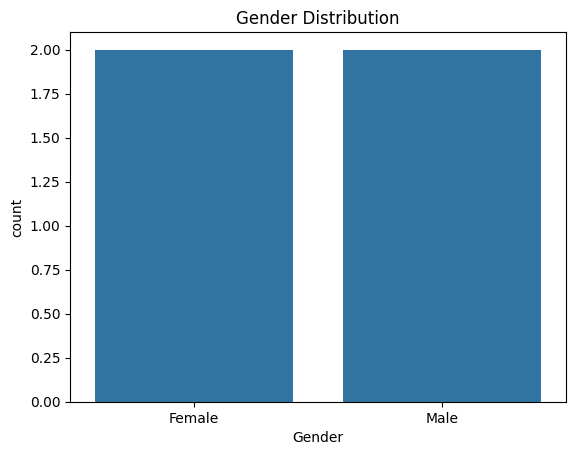

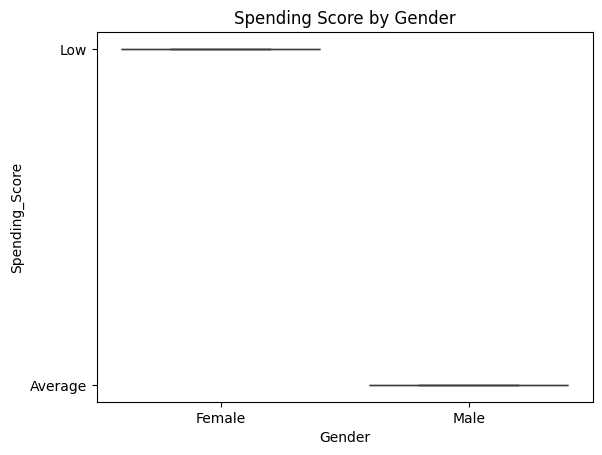

T-test: t-statistic = inf, p-value = 0.0


/tmp/ipykernel_2908/2009054727.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(male_scores, female_scores)


In [9]:
# 2. EDA (Exploratory Data Analysis)
# EDA는 데이터의 상관관계, 패턴, 특성 등을 분석하여 통찰력을 도출하는 과정입니다.

# 성별 분포 분석
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# 각 성별에 따른 지출 점수의 평균 및 분포 분석
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Spending Score by Gender')
plt.show()

# 성별에 따른 지출 점수의 차이 검정 (t-test)
# Spending_Score를 숫자로 변환
df['Spending_Score_Numeric'] = df['Spending_Score'].map({'Low': 1, 'Average': 2, 'High': 3})

# t-test
male_scores = df[df['Gender'] == 'Male']['Spending_Score_Numeric']
female_scores = df[df['Gender'] == 'Female']['Spending_Score_Numeric']
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

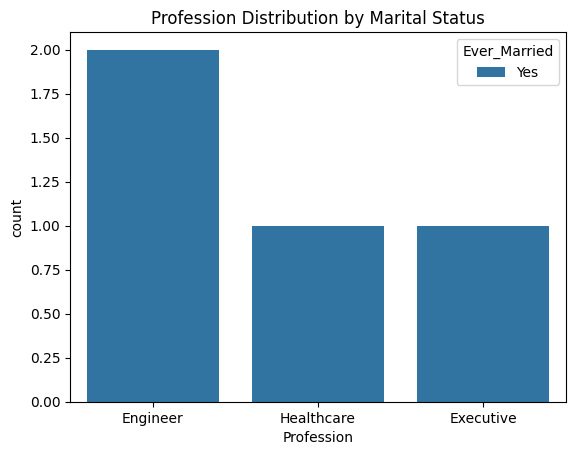

Ever_Married
Yes    4.75
Name: Work_Experience, dtype: float64


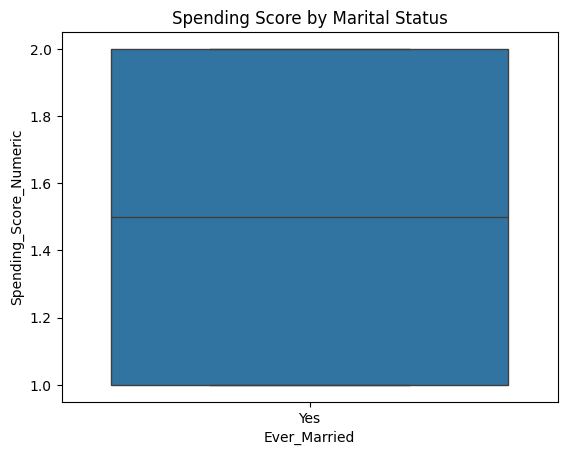

In [10]:
# 2. 결혼 여부에 따른 직업 분포 분석
# 결혼 여부에 따른 직업 분포 시각화
sns.countplot(x='Profession', hue='Ever_Married', data=df)
plt.title('Profession Distribution by Marital Status')
plt.show()

# 결혼 여부에 따른 직업의 평균 근무 연수 분석
avg_work_experience = df.groupby('Ever_Married')['Work_Experience'].mean()
print(avg_work_experience)

# 결혼 여부에 따른 직업의 지출 점수 차이 분석
sns.boxplot(x='Ever_Married', y='Spending_Score_Numeric', data=df)
plt.title('Spending Score by Marital Status')
plt.show()

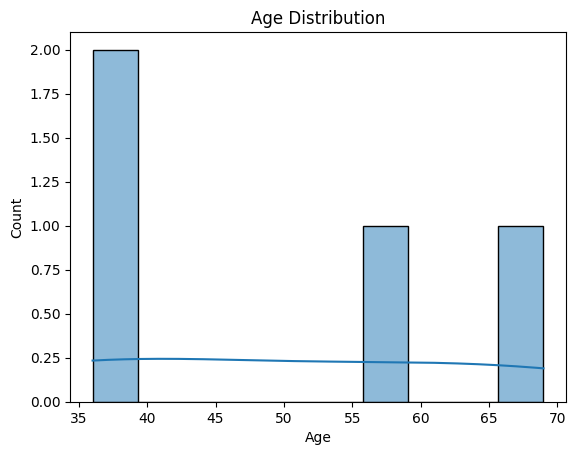

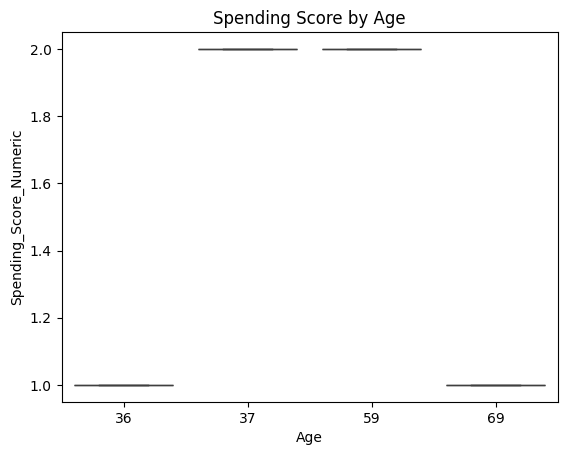

Correlation between Age and Spending Score: -0.15843204453735862


In [4]:
# 3. 나이에 따른 지출 점수 분석
# 나이 분포 분석
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

# 나이에 따른 지출 점수의 평균 및 분포 분석
sns.boxplot(x='Age', y='Spending_Score_Numeric', data=df)
plt.title('Spending Score by Age')
plt.show()

# 나이와 지출 점수 간의 상관관계 분석
correlation = df['Age'].corr(df['Spending_Score_Numeric'])
print(f'Correlation between Age and Spending Score: {correlation}')

Profession
Engineer       0.0
Executive     11.0
Healthcare     8.0
Name: Work_Experience, dtype: float64


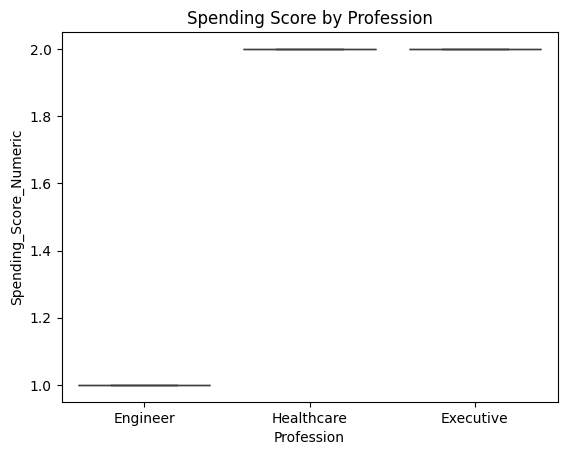

Correlation for Engineer: nan
Correlation for Healthcare: nan
Correlation for Executive: nan


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [5]:
# 4. 직업에 따른 근무 연수 분석
# 직업별 근무 연수의 평균 및 분포 분석
avg_work_experience_by_profession = df.groupby('Profession')['Work_Experience'].mean()
print(avg_work_experience_by_profession)

# 직업에 따른 지출 점수의 차이 분석
sns.boxplot(x='Profession', y='Spending_Score_Numeric', data=df)
plt.title('Spending Score by Profession')
plt.show()

# 직업별 근무 연수와 지출 점수 간의 상관관계 분석
for profession in df['Profession'].unique():
    subset = df[df['Profession'] == profession]
    correlation = subset['Work_Experience'].corr(subset['Spending_Score_Numeric'])
    print(f'Correlation for {profession}: {correlation}')

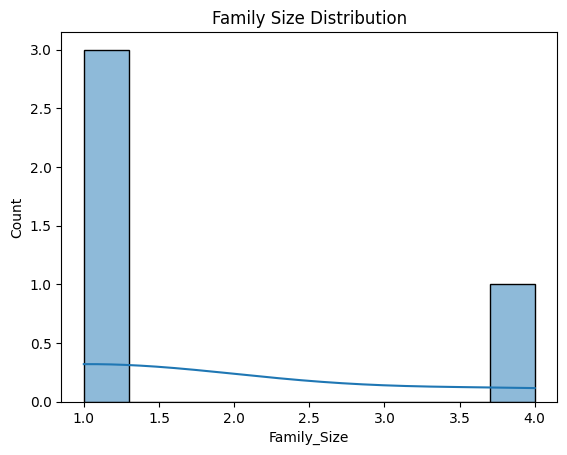

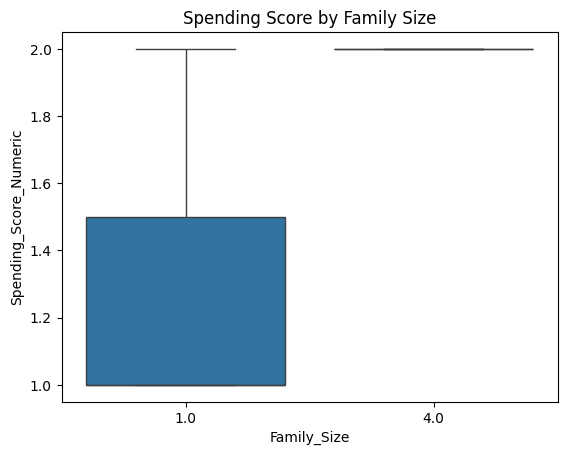

Correlation between Family Size and Spending Score: 0.5773502691896257


In [6]:
# 5. 가족 수에 따른 지출 점수 분석
# 가족 수 분포 분석
sns.histplot(df['Family_Size'], bins=10, kde=True)
plt.title('Family Size Distribution')
plt.show()

# 가족 수에 따른 지출 점수의 평균 및 분포 분석
sns.boxplot(x='Family_Size', y='Spending_Score_Numeric', data=df)
plt.title('Spending Score by Family Size')
plt.show()

# 가족 수와 지출 점수 간의 상관관계 분석
correlation = df['Family_Size'].corr(df['Spending_Score_Numeric'])
print(f'Correlation between Family Size and Spending Score: {correlation}')